# Visualization of Bicycle Crossing Fremont Bridge and Prediction of People's Habits by Unsupervised Clustering

[Reference](http://www.seattle.gov/transportation/bikecounter_fremont.htm)


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## Get Data

In [2]:
# check the function get_data_fromurl
#?get_data_fromurl

In [3]:
from commonxd.getdatefromurl import get_data_fromurl
data = get_data_fromurl()
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


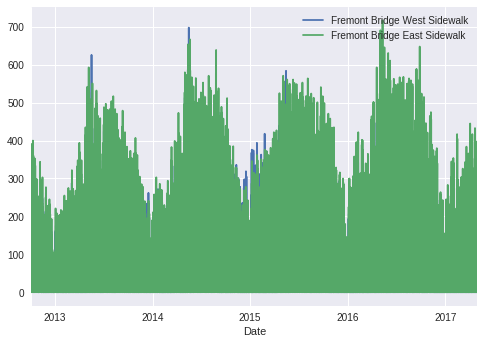

In [4]:
data.plot()

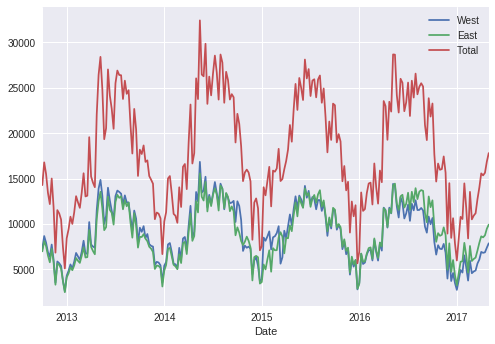

In [5]:
# resample by week
data.columns = ['West', 'East']
data['Total'] = data['West'] + data['East']
data.resample('W').sum().plot();

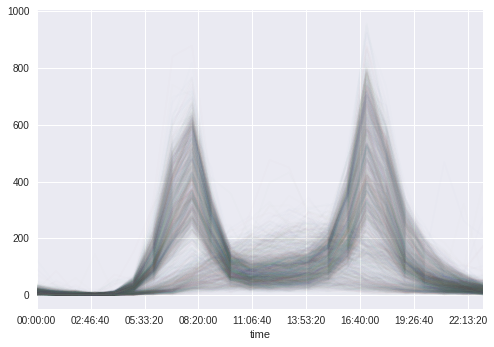

In [6]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01);

## PCA

In [7]:
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


In [8]:
X = pivoted.fillna(0).T.values
X.shape

(1671, 24)

In [9]:
X2 = PCA(2, svd_solver='full').fit_transform(X)
X2.shape

(1671, 2)

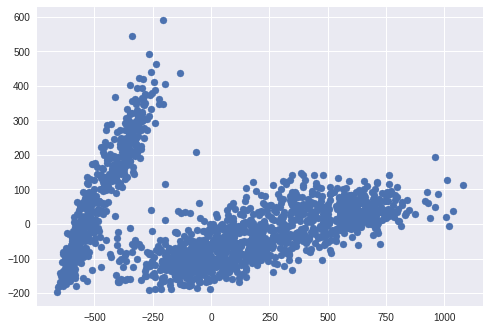

In [10]:
plt.scatter(X2[:, 0], X2[:, 1]);

## Unsupervised Clustering

In [11]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)

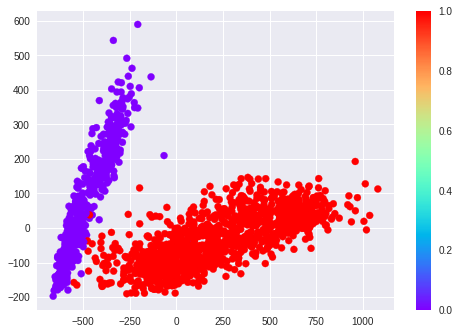

In [12]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar();

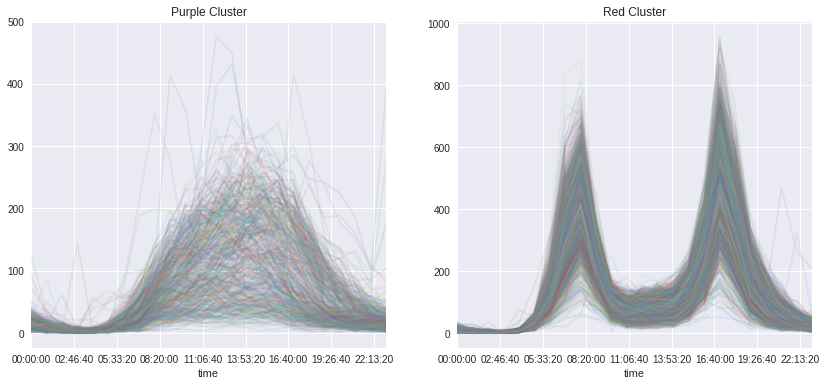

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0]);
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1]);

ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster');

## Comparing with Day of Week

In [14]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

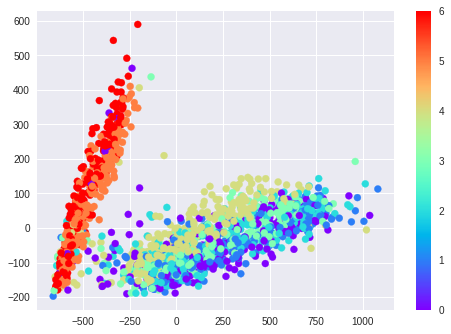

In [15]:
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar();

## Analyzing Outliers

In [16]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2017-04-17', '2017-04-18', '2017-04-19', '2017-04-20',
               '2017-04-21', '2017-04-24', '2017-04-25', '2017-04-26',
               '2017-04-27', '2017-04-28'],
              dtype='datetime64[ns]', length=1152, freq=None)

### The above outliers are holidays